In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd

/content/drive/My Drive/capstondesign


In [ ]:
%cd drive/MyDrive/capstondesign/

[Errno 2] No such file or directory: 'drive/MyDrive/capstondesign/'
/content/drive/MyDrive/capstondesign


In [ ]:
ls

'Car-Hacking Dataset'/   Data_Preprocessing.ipynb   test1.csv
 checkpoint/             Flask_server/              test_data/
 CNNLSTM_model.ipynb     Model_train.ipynb


In [ ]:
import import_ipynb
import sys
import sklearn
import tensorflow as tf
import keras


from keras.utils.np_utils  import to_categorical
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from numpy import load

import os
import gc
import random
#from CNNLSTM_model import Model



In [ ]:
!pwd

/content/drive/My Drive/capstondesign


In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/capstondesign2/Car-Hacking Dataset/normal.csv')

df2 = pd.read_csv('/content/drive/MyDrive/capstondesign2/Car-Hacking Dataset/gear.csv')
df2['Label'] = df2['Label'].replace('T',1)

df3 = pd.read_csv('/content/drive/MyDrive/capstondesign2/Car-Hacking Dataset/rpm.csv')
df3['Label'] = df3['Label'].replace('T',2)

df4 = pd.read_csv('/content/drive/MyDrive/capstondesign2/Car-Hacking Dataset/fuzzy.csv')
df4['Label'] = df4['Label'].replace('T',3)

df5 = pd.read_csv('/content/drive/MyDrive/capstondesign2/Car-Hacking Dataset/dos.csv')
df5['Label'] = df5['Label'].replace('T',4)


# df1.drop('CAN ID',axis=1,inplace = True)
# df2.drop('CAN ID',axis=1,inplace = True)
# df3.drop('CAN ID',axis=1,inplace = True)
# df4.drop('CAN ID',axis=1,inplace = True)
# df5.drop('CAN ID',axis=1,inplace = True)


In [ ]:
dftrl = [df1[:int(df1.shape[0]*0.6)],df2[:int(df2.shape[0]*0.6)],df3[:int(df3.shape[0]*0.6)],df4[:int(df4.shape[0]*0.6)],df5[:int(df5.shape[0]*0.6)]]
dftr = pd.concat(dftrl,ignore_index=True)

dfvl = [df1[int(df1.shape[0]*0.6):int(df1.shape[0]*0.8)],df2[int(df2.shape[0]*0.6):int(df2.shape[0]*0.8)],df3[int(df3.shape[0]*0.6):int(df3.shape[0]*0.8)],df4[int(df4.shape[0]*0.6):int(df4.shape[0]*0.8)],df5[int(df5.shape[0]*0.6):int(df5.shape[0]*0.8)]]
dfv = pd.concat(dfvl,ignore_index=True)
dftl = [df1[int(df1.shape[0]*0.8):int(df1.shape[0]*1)],df2[int(df2.shape[0]*0.8):int(df2.shape[0]*1)],df3[int(df3.shape[0]*0.8):int(df3.shape[0]*1)],df4[int(df4.shape[0]*0.8):int(df4.shape[0]*1)],df5[int(df5.shape[0]*0.8):int(df5.shape[0]*1)]]
dft = pd.concat(dftl,ignore_index=True)

df1[int(df1.shape[0]*0.8):int(df1.shape[0]*1)].sample(n=1000, random_state = 42).to_csv('/content/drive/MyDrive/capstondesign/test_data/only_normal.csv',index=True)

df = [df2[int(df2.shape[0]*0.8):int(df2.shape[0]*1)],df3[int(df3.shape[0]*0.8):int(df3.shape[0]*1)],df4[int(df4.shape[0]*0.8):int(df4.shape[0]*1)],df5[int(df5.shape[0]*0.8):int(df5.shape[0]*1)]]
df = pd.concat(df,ignore_index=True)
df.sample(n=1000, random_state = 42).to_csv('/content/drive/MyDrive/capstondesign/test_data/only_attack.csv',index=True)

dfv.head(30)



,Timestamp,CAN ID,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Label
0,1.479122e+09,848,8,5,40,68,104,106,0,0,107,0
1,1.479122e+09,704,8,20,0,0,0,0,0,0,0,0
2,1.479122e+09,1072,8,0,0,0,0,0,0,0,0,0
3,1.479122e+09,1201,8,237,114,105,128,0,0,0,72,0
4,1.479122e+09,497,8,0,71,222,224,13,221,240,13,0
5,1.479122e+09,339,8,0,0,0,255,0,255,0,0,0
6,1.479122e+09,2,8,0,0,0,0,0,3,4,170,0
7,1.479122e+09,688,5,133,255,0,7,125,0,0,0,0
8,1.479122e+09,304,8,158,127,0,255,57,129,4,70,0
9,1.479122e+09,305,8,23,128,0,0,155,126,4,117,0


In [ ]:
cols_to_scale = ['DLC','Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Data8']
scaler = StandardScaler()

dftr[cols_to_scale] = scaler.fit_transform(dftr[cols_to_scale])
dfv[cols_to_scale] = scaler.transform(dfv[cols_to_scale])
dft[cols_to_scale] = scaler.transform(dft[cols_to_scale])


time1 = dftr['Timestamp']
time2 = dfv['Timestamp']
time3 = dft['Timestamp']


time_scaler = MinMaxScaler(feature_range=(0, 10))
dftr['Timestamp'] = time_scaler.fit_transform(time1.values.reshape(-1,1)).flatten()
dfv['Timestamp'] = time_scaler.transform(time2.values.reshape(-1,1)).flatten()
dft['Timestamp'] = time_scaler.transform(time3.values.reshape(-1,1)).flatten()

In [ ]:
dfv.head(30)

,Timestamp,CAN ID,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Label
0,10.0,848,0.129912,-0.668389,-0.274163,0.211207,-0.268064,0.596952,-0.669069,-0.441019,0.218162,0
1,10.0,704,0.129912,-0.467688,-0.936826,-0.911770,-1.166098,-0.928420,-0.669069,-0.441019,-0.793285,0
2,10.0,1072,0.129912,-0.735289,-0.936826,-0.911770,-1.166098,-0.928420,-0.669069,-0.441019,-0.793285,0
3,10.0,1201,0.129912,2.435786,0.951765,0.822238,-0.060825,-0.928420,-0.669069,-0.441019,-0.112685,0
4,10.0,497,0.129912,-0.735289,0.239401,2.754418,0.768129,-0.741346,2.673482,3.487284,-0.670399,0
5,10.0,339,0.129912,-0.735289,-0.936826,-0.911770,1.035812,-0.928420,3.187720,-0.441019,-0.793285,0
6,10.0,2,0.129912,-0.735289,-0.936826,-0.911770,-1.166098,-0.928420,-0.623695,-0.375547,0.813687,0
7,10.0,688,-5.957400,1.044260,3.287653,-0.911770,-1.105653,0.870368,-0.669069,-0.441019,-0.793285,0
8,10.0,304,0.129912,1.378761,1.167130,-0.911770,1.035812,-0.108173,1.282013,-0.375547,-0.131591,0
9,10.0,305,0.129912,-0.427548,1.183697,-0.911770,-1.166098,1.302077,1.236639,-0.375547,0.312690,0


In [ ]:
# # Assuming your array is named df_all
dftr= np.expand_dims(dftr,axis=-1)
dftr= np.reshape(dftr,(dftr.shape[0],1,dftr.shape[1]))

dfv = np.expand_dims(dfv,axis=-1)
dfv = np.reshape(dfv,(dfv.shape[0],1,dfv.shape[1]))

dft= np.expand_dims(dft,axis=-1)
dft= np.reshape(dft,(dft.shape[0],1,dft.shape[1]))


X_train = dftr[:,:,:-1]
y_train = dftr[:,:,-1]

X_val = dfv[:,:,:-1]
y_val = dfv[:,:,-1]

X_test = dft[:,:,:-1]
y_test = dft[:,:,-1]

In [ ]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape

((1992231, 1, 11),
 (1992231, 1),
 (664076, 1, 11),
 (664076, 1),
 (664081, 1, 11),
 (664081, 1))

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
gc.collect()

0

In [ ]:
# One-hot encode the target variable
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

In [ ]:
## 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(1, 11), activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(5, activation='softmax'))


# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 모델 학습
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=64, validation_data=(X_val, y_val_cat),callbacks=[early_stopping])

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(np.argmax(y_pred,axis =1), y_test)
print('Test acc:',accuracy)

20753/20753 [==============================] - 35s 2ms/step
Test acc: 0.9998810386082421


In [ ]:
print(y_pred)

[[1.0000000e+00 3.9725786e-19 1.3571162e-24 1.1201161e-18 1.2273732e-22]
 [1.0000000e+00 1.2157721e-11 1.7931794e-26 3.0000587e-17 7.0739649e-22]
 [1.0000000e+00 1.1585909e-24 2.3210340e-33 9.1492896e-23 1.3046725e-32]
 ...
 [8.2529250e-10 1.8090764e-13 1.6659573e-13 2.9344336e-09 1.0000000e+00]
 [8.2529250e-10 1.8090764e-13 1.6659573e-13 2.9344336e-09 1.0000000e+00]
 [8.2529250e-10 1.8090764e-13 1.6659573e-13 2.9344336e-09 1.0000000e+00]]


accuracy: 0.99993, precision: 0.99993, recall = 0.99993 , f1_score = 0.99993


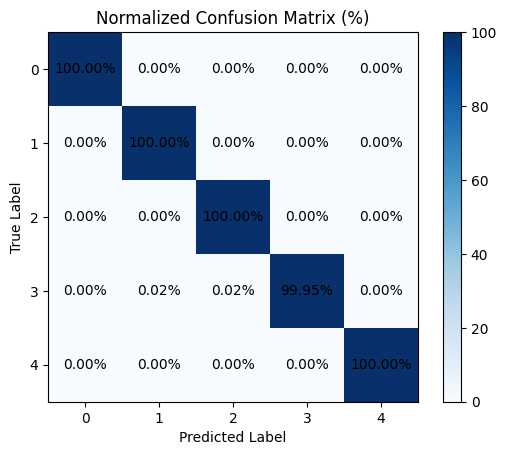

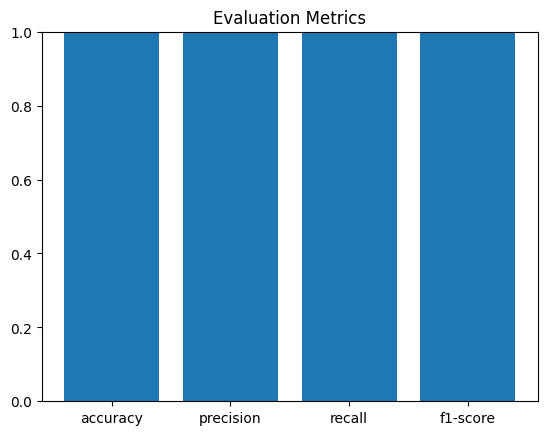

In [ ]:
# Calculate evaluation metrics
cm = confusion_matrix(y_test, np.argmax(y_pred,axis =1))
accuracy = accuracy_score(y_test, np.argmax(y_pred,axis =1))
precision = precision_score(y_test, np.argmax(y_pred,axis =1), average='weighted')
recall = recall_score(y_test, np.argmax(y_pred,axis =1), average='weighted')
f1 = f1_score(y_test, np.argmax(y_pred,axis =1), average='weighted')


print('accuracy: %.5f, precision: %.5f, recall = %.5f , f1_score = %.5f' % (accuracy,precision,recall,f1))

# Plot confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convert to percentage
cm_norm_percent = cm_norm * 100

# Plot normalized confusion matrix as percentage
plt.imshow(cm_norm_percent, cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix (%)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
plt.yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
for i in range(cm_norm_percent.shape[0]):
    for j in range(cm_norm_percent.shape[1]):
        plt.text(j, i, format(cm_norm_percent[i, j], '.2f') + '%', ha='center', va='center')
plt.show()


# Plot evaluation metrics
labels = ['accuracy', 'precision', 'recall', 'f1-score']
values = [accuracy, precision, recall, f1]
plt.bar(labels, values)
plt.ylim([0, 1])
plt.title('Evaluation Metrics')
plt.show()


In [ ]:
from collections import Counter
print(Counter(np.argmax(y_pred,axis=1)))


Counter({0: 197775, 2: 131002, 1: 119474, 4: 117505, 3: 98325})


In [ ]:
!pip list | grep tensorflow

tensorflow                    2.12.0
tensorflow-datasets           4.9.2
tensorflow-estimator          2.12.0
tensorflow-gcs-config         2.12.0
tensorflow-hub                0.13.0
tensorflow-io-gcs-filesystem  0.32.0
tensorflow-metadata           1.13.1
tensorflow-probability        0.20.1


In [ ]:
import pickle
with open('/content/drive/MyDrive/capstondesign2/for_test/data_scaler_mc.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('/content/drive/MyDrive/capstondesign2/for_test/time_scaler_mc.pkl', 'wb') as f:
    pickle.dump(time_scaler, f)


from keras.models import load_model
model.save('/content/drive/MyDrive/capstondesign2/for_test/model.h5')